In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mouse_df = pd.read_csv('data/Mouse_metadata.csv')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_df.shape

(249, 5)

In [4]:
results_df = pd.read_csv('data/Study_results.csv')
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
results_df.shape

(1893, 4)

In [6]:
merged_df = mouse_df.merge(results_df, on=['Mouse ID', 'Mouse ID'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
merged_df.shape

(1893, 8)

In [8]:
summary_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'sem'])

In [9]:
columns = [('Tumor Volume', 'mean'), ('Tumor Volume', 'median'), ('Tumor Volume', 'std'), ('Tumor Volume', 'sem')]
summary_df.columns = pd.MultiIndex.from_tuples(columns, sortorder=1)

In [10]:
summary_df

Tumor Volume                               
                     mean     median       std       sem
Drug Regimen                                            
Capomulin       40.675741  41.557809  4.994774  0.329346
Ceftamin        52.591172  51.776157  6.268188  0.469821
Infubinol       52.884795  51.820584  6.567243  0.492236
Ketapril        55.235638  53.698743  8.279709  0.603860
Naftisol        54.331565  52.509285  8.134708  0.596466
Placebo         54.033581  52.288934  7.821003  0.581331
Propriva        52.322552  50.854632  6.507770  0.512884
Ramicane        40.216745  40.673236  4.846308  0.320955
Stelasyn        54.233149  52.431737  7.710419  0.573111
Zoniferol       53.236507  51.818479  6.966589  0.516398

## **Bar Plot Using Pandas Plotting**

In [11]:
treatment_counts = merged_df.groupby('Drug Regimen')['Drug Regimen'].count()
treatment_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

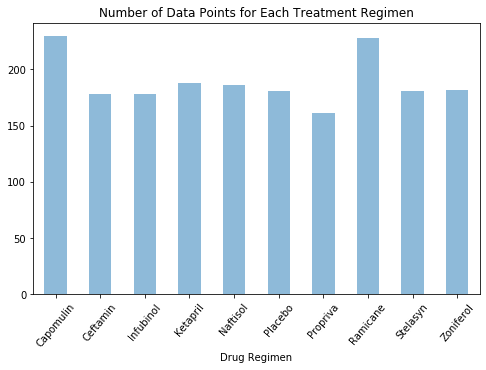

In [12]:
treatment_counts.plot(kind='bar', rot=50, title='Number of Data Points for Each Treatment Regimen', alpha=0.5, figsize=(8,5), width=0.5)

## **Bar Plot Using Matplotlib Plotting**

In [13]:
treatment_counts.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(treatment_counts.index, treatment_counts, alpha=0.5, width=0.5)
ax.set_title('Number of Data Points for Each Treatment Regimen')
plt.xticks(rotation=50)
ax.set_xlabel('Drug Regimen')

NameError: name 'plt' is not defined

In [39]:
sex_counts = merged_df['Sex'].value_counts()
sex_counts

Male      958
Female    935
Name: Sex, dtype: int64

## **Pie Chart Using Pandas Plotting**

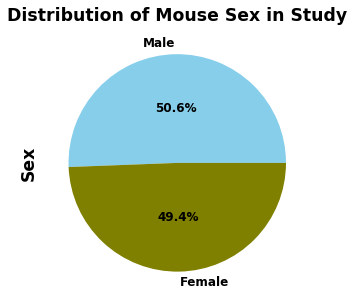

In [25]:
sex_counts = merged_df['Sex'].value_counts()
sex_pie_plot = sex_counts.plot(kind='pie', figsize=(8,5), pctdistance=.5, autopct='%1.1f%%', fontsize='large',textprops={'fontweight': 'bold'}, colors=['skyblue', 'olive'])
sex_pie_plot.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')
sex_pie_plot.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

## **Pie Chart Using Matplotlib Plotting**

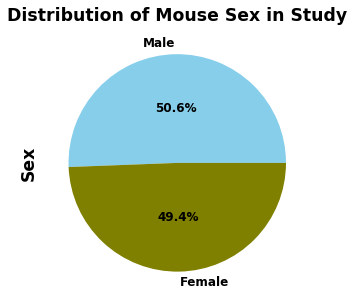

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
ax.pie(sex_counts, labels=['Male', 'Female'], colors=['skyblue', 'olive'], pctdistance=.5, autopct='%1.1f%%',textprops={'fontweight': 'bold', 'fontsize': 'large'})
ax.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')
ax.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

In [40]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
merged_df['Mouse ID'].nunique()

249

In [42]:
df_most_promising = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [44]:
df_most_promising.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [86]:
df_most_promising.loc[df_most_promising['Mouse ID'] == 'w584']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1720,w584,Infubinol,Male,3,29,0,45.000000,0
1721,w584,Infubinol,Male,3,29,5,46.051931,0
1722,w584,Infubinol,Male,3,29,10,47.298508,0
1723,w584,Infubinol,Male,3,29,15,51.265440,0
1724,w584,Infubinol,Male,3,29,20,53.323507,1
1725,w584,Infubinol,Male,3,29,25,55.650838,1
1726,w584,Infubinol,Male,3,29,30,58.268442,1


In [97]:
final_tumor_volume_df = df_most_promising.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID', 'Drug Regimen']).set_index('Mouse ID')
final_tumor_volume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1
c758,Ramicane,Male,9,17,45,33.397653,1
i557,Capomulin,Female,1,24,45,47.685963,1
m957,Capomulin,Female,3,19,45,33.329098,1


In [113]:
tumor_volume_quartiles_per_drug = final_tumor_volume_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25, .5, .75])
tumor_volume_quartiles_per_drug.index

MultiIndex([('Capomulin', 0.25),
            ('Capomulin',  0.5),
            ('Capomulin', 0.75),
            ( 'Ceftamin', 0.25),
            ( 'Ceftamin',  0.5),
            ( 'Ceftamin', 0.75),
            ('Infubinol', 0.25),
            ('Infubinol',  0.5),
            ('Infubinol', 0.75),
            ( 'Ramicane', 0.25),
            ( 'Ramicane',  0.5),
            ( 'Ramicane', 0.75)],
           names=['Drug Regimen', None])

In [105]:
infubinol_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ramicane_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
capomulin_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ceftamin_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
print(infubinol_quartiles)
print(ramicane_quartiles)
print(capomulin_quartiles)
print(ceftamin_quartiles)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [133]:
quartiles_df = pd.DataFrame(tumor_volume_quartiles_per_drug).unstack(level=-1)
quartiles_df.columns = ['Lower Q', 'Median', 'Upper Q']
quartiles_df['IQR'] = quartiles_df['Upper Q'] - quartiles_df['Lower Q']
quartiles_df['Lower Outlier Boundary'] = quartiles_df['Lower Q'] - (1.5 * quartiles_df['IQR'])
quartiles_df['Upper Outlier Boundard'] = quartiles_df['Upper Q'] + (1.5 * quartiles_df['IQR'])
quartiles_df

,Lower Q,Median,Upper Q,IQR,Lower Outlier Boundary,Upper Outlier Boundard
Drug Regimen,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811


In [137]:
quartiles_df.loc['Infubinol','Lower Outlier Boundary']

36.83290494999999

In [134]:
final_tumor_volume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1
c758,Ramicane,Male,9,17,45,33.397653,1
i557,Capomulin,Female,1,24,45,47.685963,1
m957,Capomulin,Female,3,19,45,33.329098,1


In [143]:
infubinol_volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
infubinol_volumes

Mouse ID
z581    62.754451
e476    62.435404
a203    67.973419
a251    65.525743
c139    72.226731
f345    60.918767
k483    66.196912
a685    66.083066
y163    67.685569
i386    67.289621
k804    62.117279
o809    55.629428
q132    54.656549
n671    60.165180
a577    57.031862
w584    58.268442
c895    60.969711
s121    55.650681
w193    50.005138
v719    54.048608
v766    51.542431
c326    36.321346
o813    45.699331
v339    46.250112
m756    47.010364
Name: Tumor Volume (mm3), dtype: float64

In [152]:
infubinol_lower_outliers = [volume for volume in infubinol_volumes if volume < quartiles_df.loc['Infubinol','Lower Outlier Boundary']]
infubinol_upper_outliers = [volume for volume in infubinol_volumes if volume > quartiles_df.loc['Infubinol','Upper Outlier Boundard']]
infubinol_outliers = infubinol_lower_outliers + infubinol_upper_outliers
infubinol_outliers

[36.321345799999996]

In [151]:
infubinol_lower_outliers

[36.321345799999996, []]

In [141]:
final_tumor_volume_df['is_outlier'] = True if (final_tumor_volume_df['Drug Regimen'] == 'Infubinol') & (final_tumor_volume_df['Tumor Volume (mm3)'] < quartiles_df.loc['Infubinol','Lower Outlier Boundary'] | final_tumor_volume_df['Tumor Volume (mm3)'] > quartiles_df.loc['Infubinol','Upper Outlier Boundary'])

SyntaxError: invalid syntax (<ipython-input-141-ab879fae214a>, line 1)

In [135]:
final_tumor_volume_df.shape

(100, 7)

In [123]:
quartiles_df.columns[0][1]

0.25

In [100]:
final_tumor_volume = final_tumor_volume_df[['Tumor Volume (mm3)']]
final_tumor_volume

,Tumor Volume (mm3)
Mouse ID,
z581,62.754451
e476,62.435404
c758,33.397653
i557,47.685963
m957,33.329098
...,...
m756,47.010364
x226,45.000000
b447,45.000000


In [91]:
final_tumor_volume_df_grouped_by_drug = final_tumor_volume_df.groupby('Drug Regimen')

In [ ]:
final_tumor_volume_df_grouped_by_drug['Tumor']

In [51]:
df_most_promising['Mouse ID'].nunique()

100

In [45]:
df_most_promising['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [67]:
df_most_promising.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].argmax(df_most_promising.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max())

AttributeError: 'SeriesGroupBy' object has no attribute 'argmax'

In [54]:
groupby_mouse_drug.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1863,z581,Infubinol,Female,24,25,0,45.000000,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1865,z581,Infubinol,Female,24,25,10,50.478750,2
1866,z581,Infubinol,Female,24,25,15,51.196304,2
